# Logistic Regression

In [1]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy.stats import randint
from get_processed_data import get_processed_data
from show_metrics import show_metrics
from sampling import oversample, undersample, smote, ncr
from feature_selection import rf_select

pd.options.display.max_rows = 60
pd.options.display.max_columns = 60

df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()

Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


## Base model

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


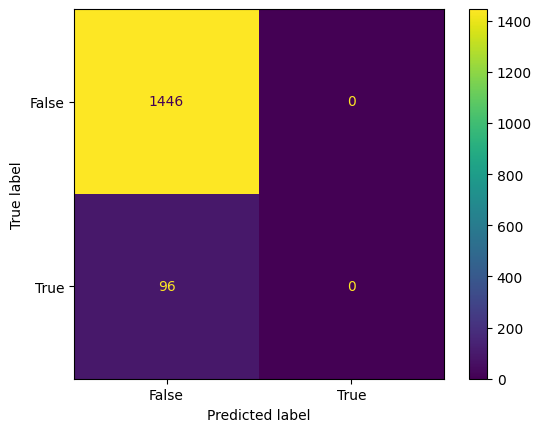

Accuracy: 0.9377431906614786
Precision: 0.0
Recall: 0.0
Specificity: 1.0
F1_score: 0.0


C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


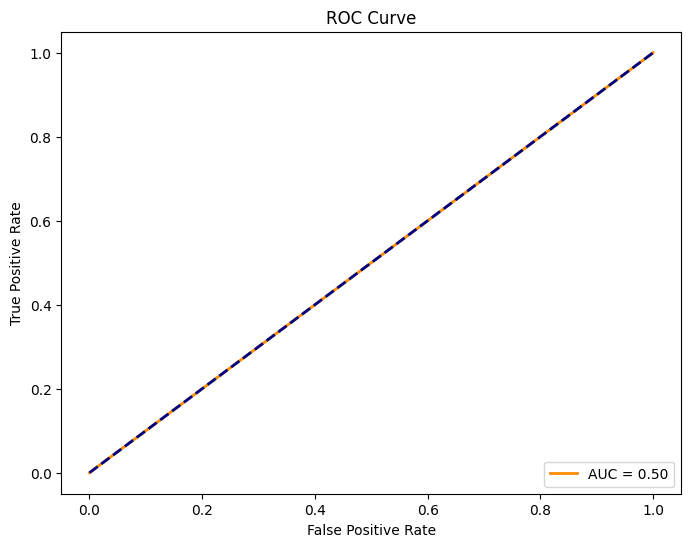

In [2]:
logr = linear_model.LogisticRegression()
logr.fit(X_train, y_train)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## Undersample

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


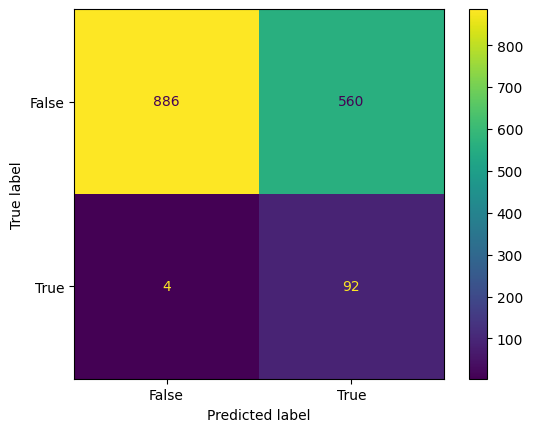

Accuracy: 0.6342412451361867
Precision: 0.1411042944785276
Recall: 0.9583333333333334
Specificity: 0.6127247579529738
F1_score: 0.24598930481283424


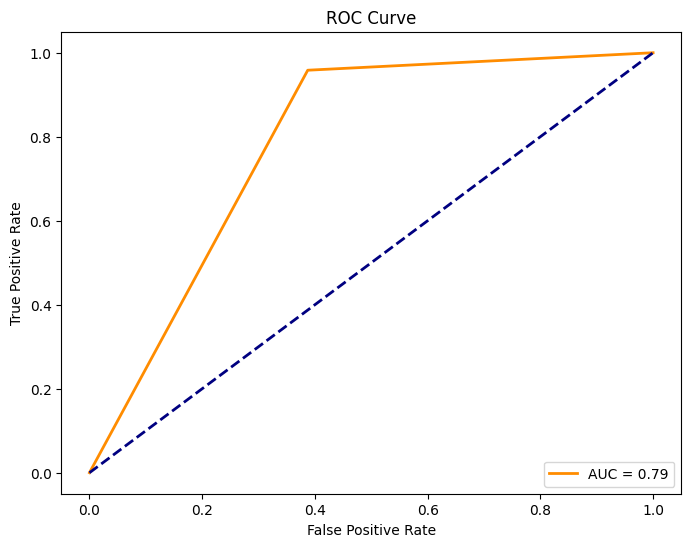

In [3]:
X_under, y_under = undersample(X_train, y_train)
logr = linear_model.LogisticRegression()
logr.fit(X_under, y_under)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## Oversample

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


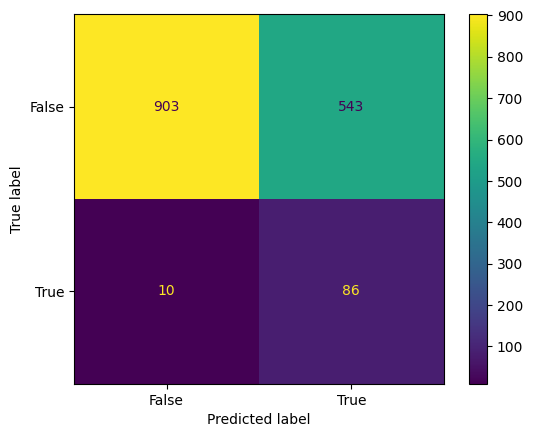

Accuracy: 0.6413748378728924
Precision: 0.13672496025437203
Recall: 0.8958333333333334
Specificity: 0.6244813278008299
F1_score: 0.23724137931034484


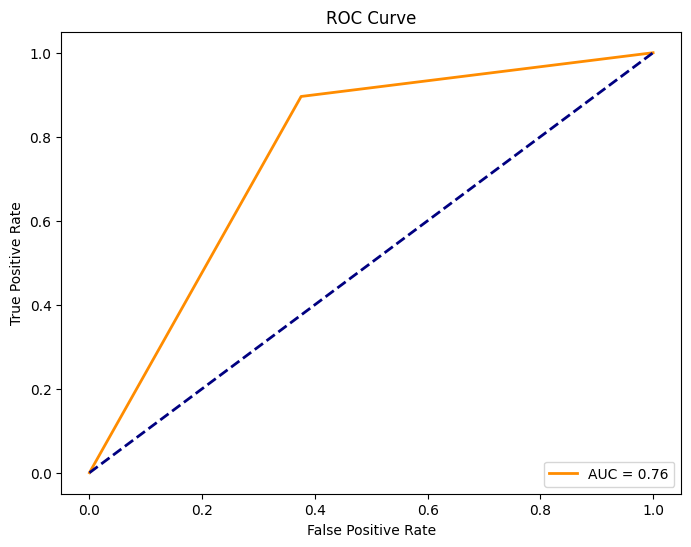

In [4]:
X_over, y_over = oversample(X_train, y_train)
logr = linear_model.LogisticRegression()
logr.fit(X_over, y_over)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## SMOTE

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


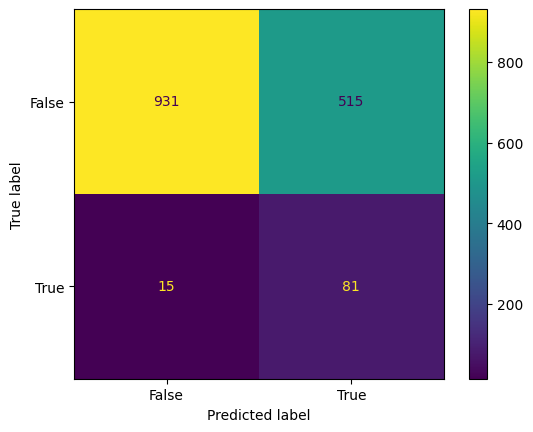

Accuracy: 0.6562905317769131
Precision: 0.13590604026845637
Recall: 0.84375
Specificity: 0.6438450899031812
F1_score: 0.23410404624277456


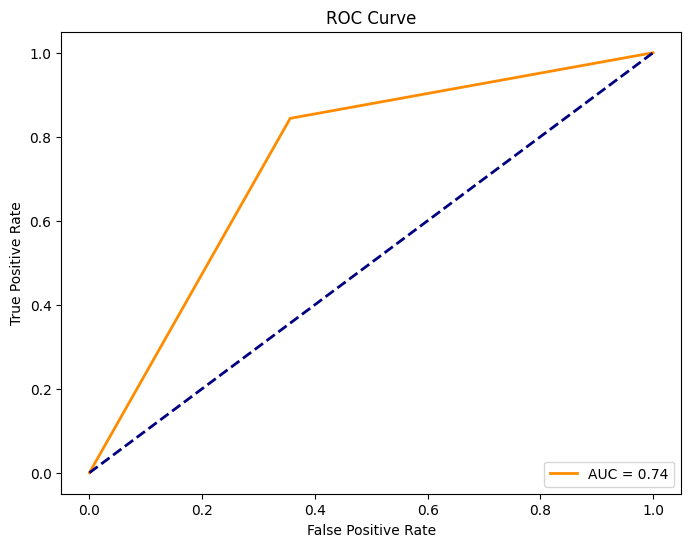

In [5]:
X_smote, y_smote = smote(X_train, y_train)
logr = linear_model.LogisticRegression()
logr.fit(X_smote, y_smote)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## Neighbourhood Cleaning Rule

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


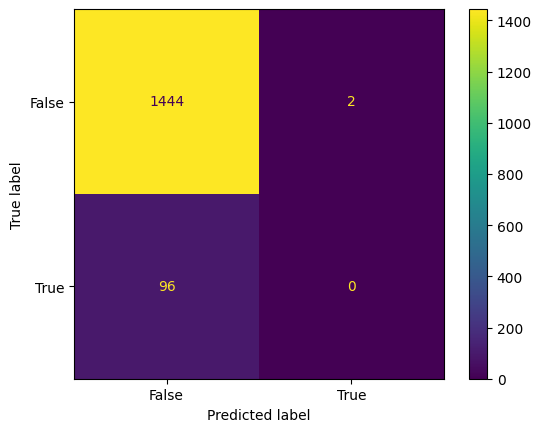

Accuracy: 0.9364461738002594
Precision: 0.0
Recall: 0.0
Specificity: 0.9986168741355463
F1_score: 0.0


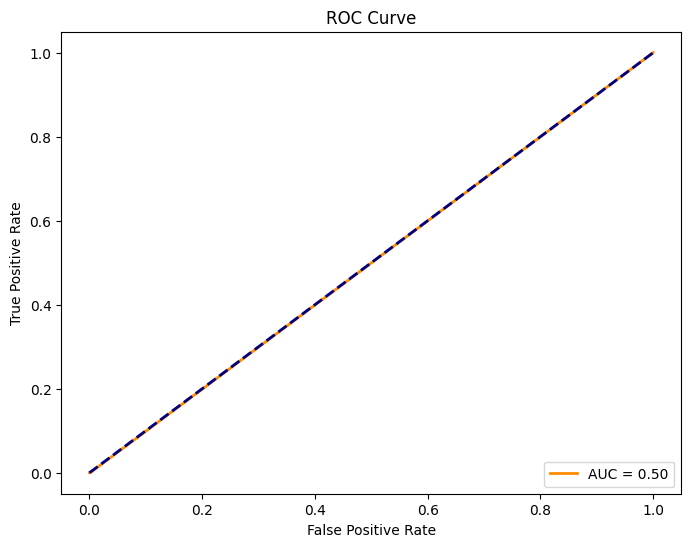

In [6]:
X_ncr, y_ncr = ncr(X_train, y_train)
logr = linear_model.LogisticRegression()
logr.fit(X_ncr, y_ncr)
predicted = logr.predict(X_val)
show_metrics(y_val, predicted, 1, 0)

## Oversampling with feature selection

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


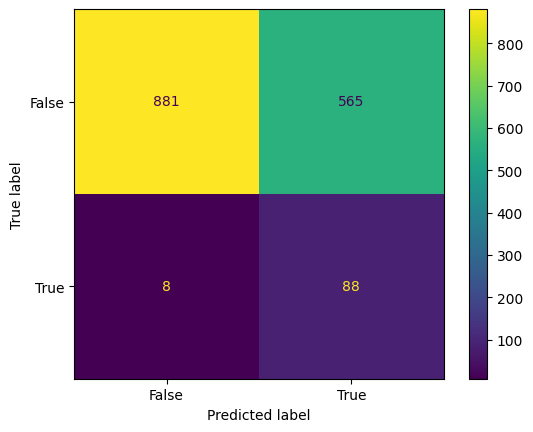

Accuracy: 0.6284046692607004
Precision: 0.13476263399693722
Recall: 0.9166666666666666
Specificity: 0.6092669432918395
F1_score: 0.2349799732977303


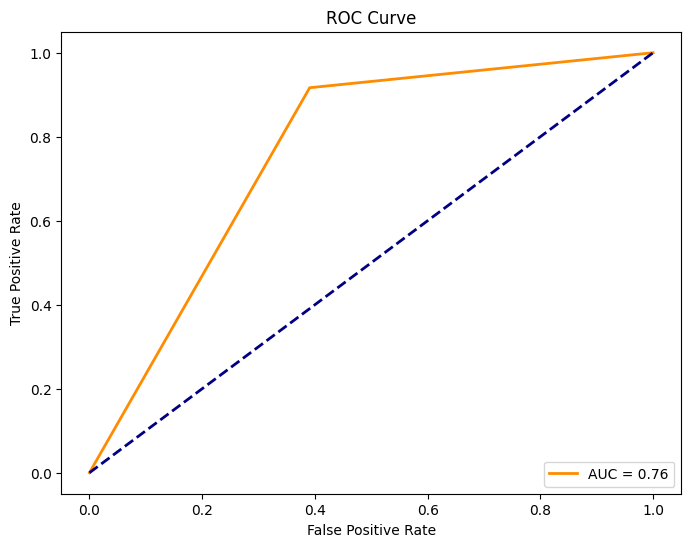

In [7]:
features = rf_select(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_over = X_over[features]
X_val_over = X_val[features]
logr = linear_model.LogisticRegression()
logr.fit(X_over, y_over)
predicted = logr.predict(X_val_over)
show_metrics(y_val, predicted, 1, 0)

## Checking best model against test data

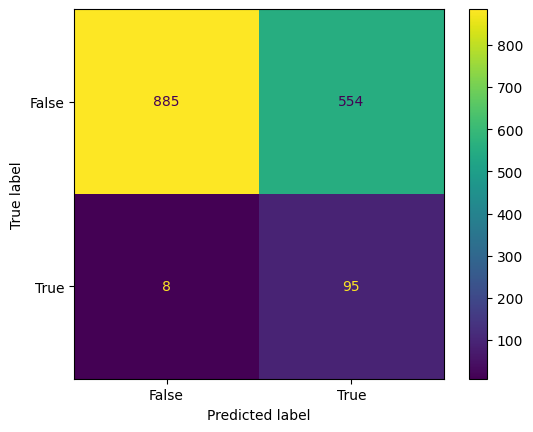

Accuracy: 0.6355382619974059
Precision: 0.14637904468412943
Recall: 0.9223300970873787
Specificity: 0.6150104239054899
F1_score: 0.2526595744680851


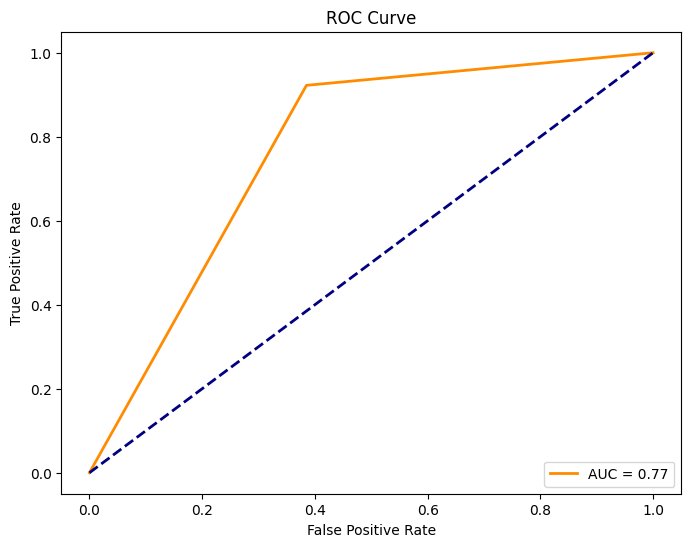

In [8]:
X_test = X_test[features]
predicted = logr.predict(X_test)
show_metrics(y_test, predicted, 1, 0)